In [46]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow.keras.utils as utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [49]:
# 1. 데이터 셋 준비
df = pd.read_excel('data/heart-disease.xlsx')

df.replace('?',np.NAN, inplace=True)
df.dropna(inplace=True)
X=df.iloc[:,:-1].values
Y=df.iloc[:,13].to_frame().values
# normalize
scale_x = MinMaxScaler()
scale_x.fit(X)
scaled_X= scale_x.transform(X)
# 학습데이터 : 테스트 데이터 = 7:3
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,test_size=0.3,random_state=5)

In [50]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((207, 13), (207, 1), (89, 13), (89, 1))

In [68]:
# 2. 모델구성
model=Sequential()
# layer 구성
model.add(Dense(128,input_dim=13,activation='tanh'))
# 과적합을 해결하고자 기억하되 두루뭉실하게 기억하자
model.add(Dropout(0.1))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(16,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

# 3. 모델 학습과정 
from tensorflow.keras import metrics
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

# accuracy(정확도) : 예측결과와 실제값이 동일한 건수 / 전체 건수
# Recall(재현율) : 실제 True인데 예측도 True로 한 건수 / 실제 True인 전체 건수
# Precision(정밀도) : 실제 True인데 예측더 True로 한 건수 / True로 예측한 건수


# 4. 학습
hist = model.fit(X_train,Y_train,epochs=100,batch_size=10,validation_split=0.2,verbose=2)
# validation_split : train 데이터에서 임의로 데이터를 추출하여 validation 하는것

Epoch 1/100
17/17 - 1s - loss: 0.1798 - accuracy: 0.7333 - val_loss: 0.1137 - val_accuracy: 0.8333
Epoch 2/100
17/17 - 0s - loss: 0.1558 - accuracy: 0.7939 - val_loss: 0.1525 - val_accuracy: 0.8571
Epoch 3/100
17/17 - 0s - loss: 0.1284 - accuracy: 0.8364 - val_loss: 0.1198 - val_accuracy: 0.8810
Epoch 4/100
17/17 - 0s - loss: 0.1361 - accuracy: 0.8182 - val_loss: 0.1003 - val_accuracy: 0.8333
Epoch 5/100
17/17 - 0s - loss: 0.1337 - accuracy: 0.8303 - val_loss: 0.1165 - val_accuracy: 0.8571
Epoch 6/100
17/17 - 0s - loss: 0.1428 - accuracy: 0.8364 - val_loss: 0.1167 - val_accuracy: 0.8810
Epoch 7/100
17/17 - 0s - loss: 0.1272 - accuracy: 0.8182 - val_loss: 0.1012 - val_accuracy: 0.8810
Epoch 8/100
17/17 - 0s - loss: 0.1363 - accuracy: 0.8182 - val_loss: 0.1259 - val_accuracy: 0.8810
Epoch 9/100
17/17 - 0s - loss: 0.1167 - accuracy: 0.8485 - val_loss: 0.1364 - val_accuracy: 0.8810
Epoch 10/100
17/17 - 0s - loss: 0.1193 - accuracy: 0.8303 - val_loss: 0.1278 - val_accuracy: 0.8571
Epoch 11/

17/17 - 0s - loss: 0.0895 - accuracy: 0.8788 - val_loss: 0.1206 - val_accuracy: 0.8571
Epoch 84/100
17/17 - 0s - loss: 0.0744 - accuracy: 0.9091 - val_loss: 0.1600 - val_accuracy: 0.7619
Epoch 85/100
17/17 - 0s - loss: 0.0624 - accuracy: 0.9273 - val_loss: 0.1924 - val_accuracy: 0.7619
Epoch 86/100
17/17 - 0s - loss: 0.0567 - accuracy: 0.9273 - val_loss: 0.2021 - val_accuracy: 0.7381
Epoch 87/100
17/17 - 0s - loss: 0.0636 - accuracy: 0.9273 - val_loss: 0.1726 - val_accuracy: 0.7857
Epoch 88/100
17/17 - 0s - loss: 0.0673 - accuracy: 0.9091 - val_loss: 0.1557 - val_accuracy: 0.8095
Epoch 89/100
17/17 - 0s - loss: 0.0767 - accuracy: 0.9030 - val_loss: 0.1295 - val_accuracy: 0.8333
Epoch 90/100
17/17 - 0s - loss: 0.0700 - accuracy: 0.9273 - val_loss: 0.1269 - val_accuracy: 0.8571
Epoch 91/100
17/17 - 0s - loss: 0.0658 - accuracy: 0.9273 - val_loss: 0.1124 - val_accuracy: 0.8571
Epoch 92/100
17/17 - 0s - loss: 0.0878 - accuracy: 0.8848 - val_loss: 0.2132 - val_accuracy: 0.7381
Epoch 93/100


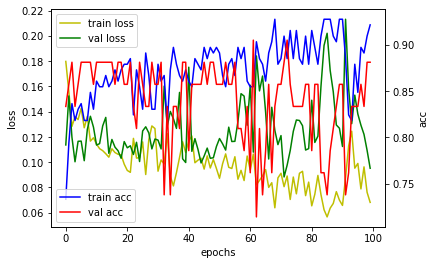

In [69]:
# 5. 모델학습과정을 표시하고 평가하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축 공유 하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [67]:
# 6. 평가 및 예측
score = model.evaluate(X_test,Y_test,verbose=0)
print('model loss : ', score[0])
print('model accuracy : ', score[1])

model loss :  0.1735050529241562
model accuracy :  0.7865168452262878


In [74]:
# 7. metrix (성능평가지표)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred>0.5)
pred
print(confusion_matrix(Y_test,pred), end='\n')
print('f1_score : ',f1_score(Y_test,pred))

[[33  9]
 [10 37]]
f1_score :  0.795698924731183
